# Exercise 1: Harris Detection Corner

## Task

**Harris Corner Detection** is a classic corner detection algorithm. Use the Harris Corner Detection algorithm to detect corners in an image:
* Load an image of your choice.
* Convert it to grayscale.
* Apply the Harris Corner Detection method to detect corners.
* Visualize the corners on the image and display the result.


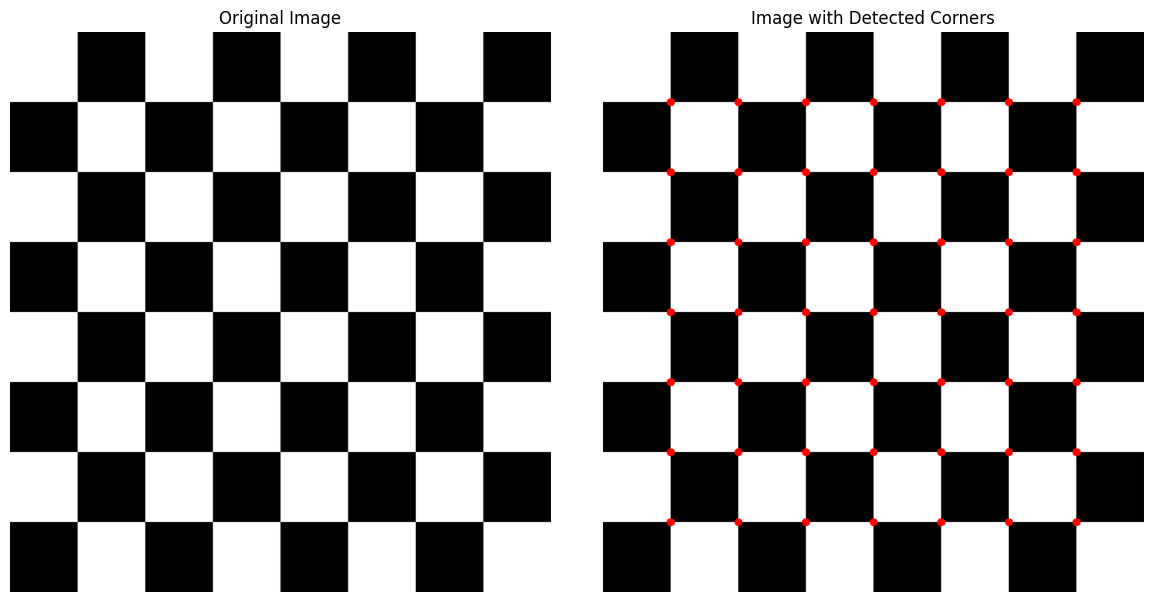

Number of detected corners: 1365


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("checkerboard.png")

# Converting the image into grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detection
harris_corners = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)

# Dilate the result to mark the corners
harris_corners = cv2.dilate(harris_corners, None)

# Threshold for an optimal value, it may vary depending on the image
threshold = 0.01 * harris_corners.max()

# Create a copy of the original image to draw corners on
image_with_corners = np.copy(image)

# Get the coordinates of detected corners
y, x = np.where(harris_corners > threshold)

# Iterate through all the corners and draw larger circles on the image
for i, j in zip(x, y):
    cv2.circle(image_with_corners, (i, j), radius=5, color=(0, 0, 255), thickness=2)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Image with Detected Corners')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the number of detected corners
print(f"Number of detected corners: {len(x)}")

The Harris Corner Detection algorithm bases its operation on a change in intensity as a small region of pixels shifts across the image. Corners are defined as a point with which the intensity varies in many directions so significantly that the checkerboard is highly intuitive to apply to the algorithm used here. A checkerboard image is basically an image of a grid with black and white squares alternating, thus giving a dense concentration of high contrast edges at corners where there are points of interest, that is, keen edges. In this activity, the algorithm has detected 1365 corners which meant that it therefore manifests that many keen points of interest, that is, corners have been detected where such intense changes in gradient take place. The algorithm computes a corner response function that is the amount of two-dimensional intensity change for each pixel, such as along the edges or corners of checkerboard squares. Checkerboards are a particularly good test case since the checkerboard structure has to be uniform and well-distributed, and thus a dense grid of corners provides ample opportunity for quite precise detection and evaluation of corner-detection algorithms.  The number of the actual corners detected should be very high, as the pattern is periodic and symmetrical.

## Key Points
* HOG focuses on the structure of objects through gradients.
* Useful for human detection and general object recognition.

# Exercise 2: HOG (Histogram of Oriented Gradients) Feature Extraction

## Task

The **HOG descriptor** is widely used for object detection, especially in human detection.
* Load an image of a person or any object.
* Convert the image to grayscale.
* Apply the HOG descriptor to extract features.
* Visualize the gradient orientations on the image

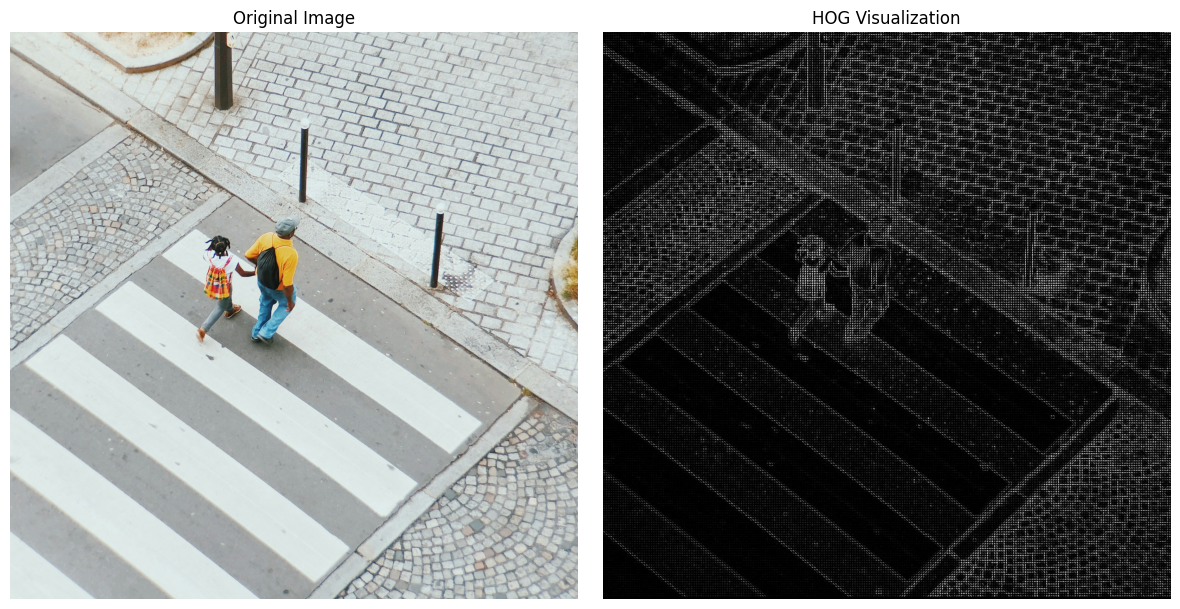

Shape of HOG features: (2047752,)
Number of HOG features: 2047752


In [10]:
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("pedestrian.jpg")

# Converting the image into grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the HOG descriptor
fd, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG Visualization')
ax2.axis('off')

plt.tight_layout()
plt.show()

# Print some information about the HOG features
print(f"Shape of HOG features: {fd.shape}")
print(f"Number of HOG features: {fd.size}")

As seen above, HOG Feature Extraction is applied to an image of two pedestrians who are walking. HOG Feature Extraction resulted in features at a total of 2,047,752 for all the same shape. Such a high number of features denotes a detailed encoding of the image's local gradients and edge orientations. The HOG algorithm works by breaking the image down into small cells and computing a histogram of gradient orientations within each cell. These captures shape information, for it highlights regions of high gradient change, like edges and contours—rather than colors or textures. Pedestrian images fit perfectly well with this approach since the human body, especially when moving, presents remarkable contours and shapes. The human form, with its limbs and outlines, produces significant gradients, which HOG captures and summarizes effectively using those gradient histograms. It is robust in detecting people under varying conditions of lighting, scale, or slight pose changes and is thus ideal for pedestrian detection. Several features represent the rich detail captured by the algorithm, which can be represented so well that a model trained on these features may differentiate pedestrians from background with high precision. Its strength is pointed at focusing on the most relevant shape and edge features because these are central aspects that carry information necessary for such tasks as detecting humans in images.

## Key Points
* HOG focuses on the structure of objects through gradients.
* Useful for human detection and general object recognition.

# Exercise 3: FAST (Features from Accelerated Segment Test) Keypoint Detection

## Task
**FAST** is another keypoint detector known for its speed.
* Load an image.
* Convert the image to grayscale.
* Apply the FAST algorithm to detect keypoints.
* Visualize the keypoints on the image and display the result.


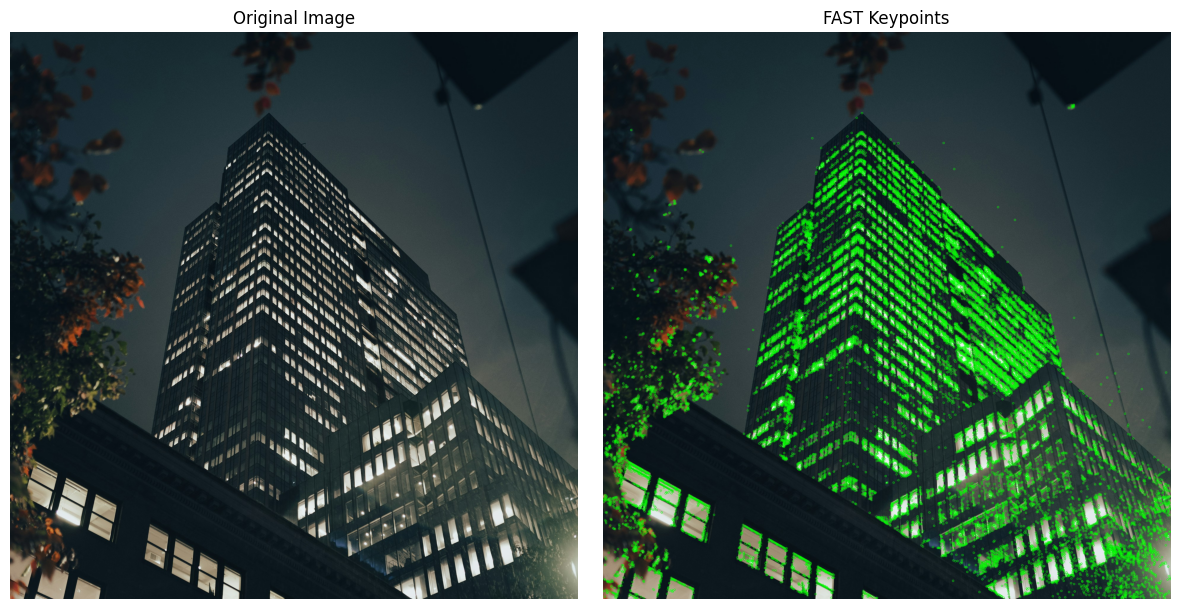

Number of keypoints detected: 21310
FAST parameters:
Threshold: 10
nonmaxSuppression: True
neighborhood: 2


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("building.jpg")

# Get image dimensions
height, width, _ = image.shape

# Determine the size of the square (based on the smallest side)
square_size = min(height, width)

# Compute cropping dimensions (center crop)
y_offset = (height - square_size) // 2
x_offset = (width - square_size) // 2

# Crop the image to a square
square_image = image[y_offset:y_offset + square_size, x_offset:x_offset + square_size]

# Converting the image to grayscale
gray_image = cv2.cvtColor(square_image, cv2.COLOR_BGR2GRAY)

# Create FAST object
fast = cv2.FastFeatureDetector_create()

# Detect keypoints
keypoints = fast.detect(gray_image, None)

# Draw keypoints on the cropped square image
image_with_keypoints = cv2.drawKeypoints(square_image, keypoints, None, color=(0, 255, 0))

# Visualize the results
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(square_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('FAST Keypoints')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the number of keypoints detected
print(f"Number of keypoints detected: {len(keypoints)}")

# Print some FAST parameters
print("FAST parameters:")
print(f"Threshold: {fast.getThreshold()}")
print(f"nonmaxSuppression: {fast.getNonmaxSuppression()}")
print(f"neighborhood: {fast.getType()}")

Keypoint Detection algorithm of FAST features in an accelerated segment test was applied to a night image of a building. The total number of keypoints detected was 21,310. FAST features are applied to rapidly detect corner-like features by testing the intensity of pixels around a candidate point in a circular pattern. In this case, the threshold was set as 10, so it found only those points where the pixel intensity change exceeded this value, making those regions contain key features. The parameter `nonmaxSuppression: True` ensures only the strongest keypoints are kept and weaker responses around a stronger one are suppressed to avoid multiple detections in close proximity. The `neighborhood: 2` parameter describes the way the algorithm calculates the pixels around which contribute to corner responses.

The building image taken in nighttime, because of artificial lighting, shadows, and structural edges, boasts sharp contrast in intensity that is well suited for a keypoint detection algorithm. Lit areas and their corresponding dark regions, as well as the repeating geometric patterns from the structure of the building, make corner features hard to miss. FAST is very well suited to such environments, as it can highly efficiently detect keypoints in images of high contrast with a rather low cost in the form of computations that render the algorithm highly powerful when applications demand real-time processing. The large number of keypoints detected means the algorithm found many distinctive points that could be useful for tasks like matching and tracking images or for 3D reconstruction when light is low.

## Key Points
* FAST is designed to be computationally efficient and quick in detecting keypoints.
* It is often used in real-time applications like robotics and mobile visio

# Exercise 4: Feature Matching using ORB and FLANN

## Task
Use ORB descriptors to find and match features between two images using FLANN-based matching.
* Load two images of your choice.
* Extract keypoints and descriptors using ORB.
* Match features between the two images using the FLANN matcher.
* Display the matched features.


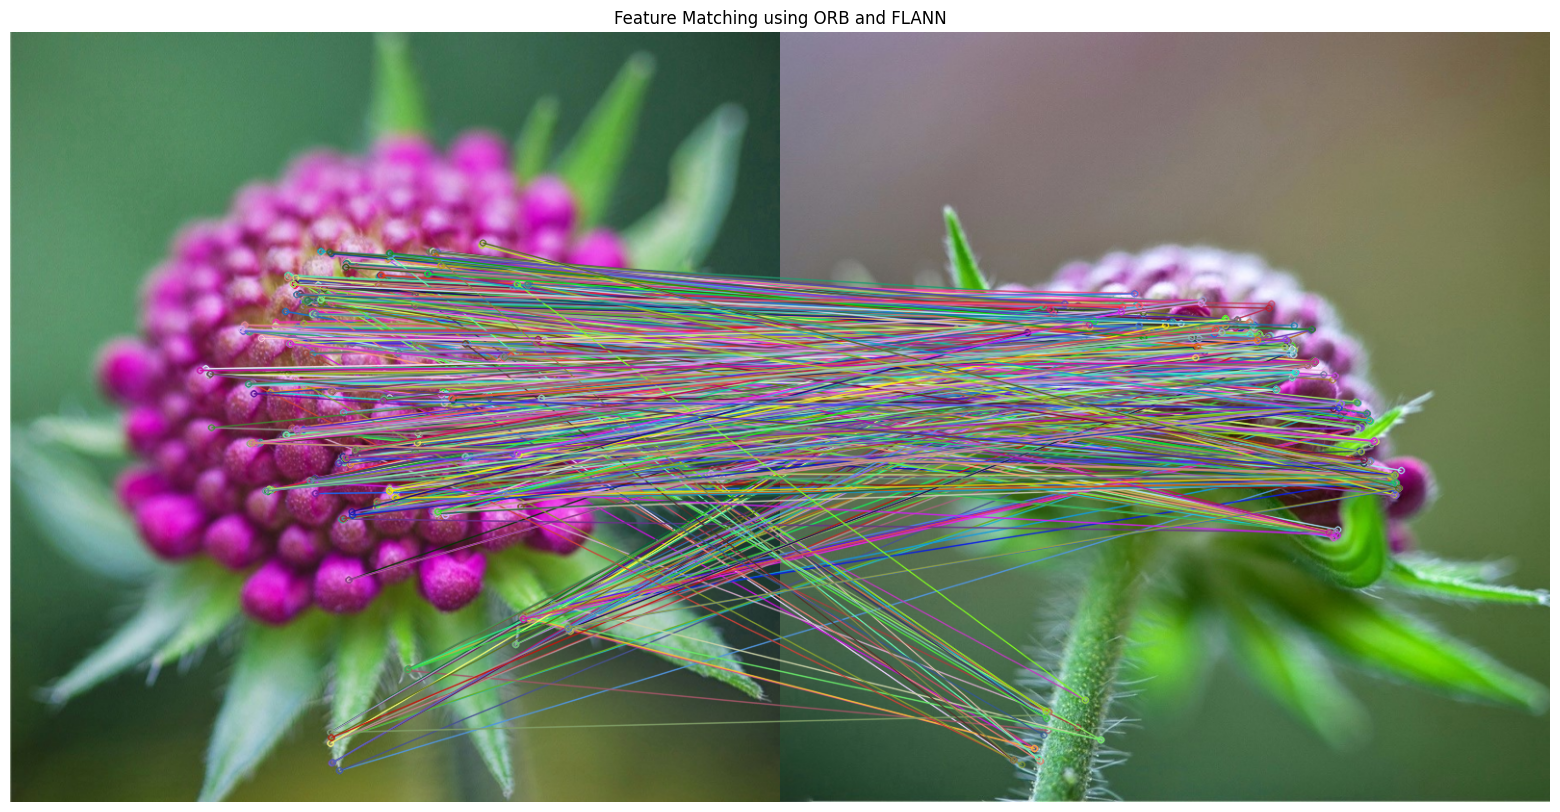

Number of keypoints in image 1: 500
Number of keypoints in image 2: 500
Number of matches: 998


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess(image_path, target_size=800):
  # Load the image
  image = cv2.imread(image_path)

  # Get image dimensions
  height, width = image.shape[:2]

  # Calculate aspect ratio
  aspect_ratio = width / height

  # Determine new dimensions
  if width > height:
    new_width = target_size
    new_height = int(new_width / aspect_ratio)
  else:
    new_height = target_size
    new_width = int(new_height * aspect_ratio)

  # Resize the image
  resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

  # Converting the image to grayscale
  gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

  return resized_image, gray_image

# Load and preprocess both images
image1, gray1 = load_and_preprocess("flower-1.jpg")
image2, gray2 = load_and_preprocess("flower-2.jpg")

# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# FLANN parameters
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6,
                   key_size = 12,
                   multi_probe_level = 1)
search_params = dict(checks=50)

# Initialize FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Perform matching
matches = flann.knnMatch(des1, des2, k=2)

# Flatten the matches list
all_matches = [item for sublist in matches for item in sublist]

# Draw all matches
img_matches = cv2.drawMatches(image1, kp1, image2, kp2, all_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display results
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching using ORB and FLANN')
plt.axis('off')
plt.show()

# Print some information
print(f"Number of keypoints in image 1: {len(kp1)}")
print(f"Number of keypoints in image 2: {len(kp2)}")
print(f"Number of matches: {len(all_matches)}")

On the two images of the flower captured from perspectives, feature matching was done using the ORB (Oriented FAST and Rotated BRIEF) combined with FLANN (Fast Library for Approximate Nearest Neighbors). The ORB detector would find keypoints to a number of 500 while in the case of the FLANN matcher, there would be 1,000 matches between these keypoints. ORB is an efficient algorithm for feature detection and description and insusceptible to scale and rotation, which makes it ideal for real-time applications. It detects keypoints and computes descriptors of these points, which encode local appearance of the image around each keypoint. Then FLANN is utilized in order to match descriptors by finding the nearest neighbors between the two images even if they have differences such as scale, rotation, or perspective.

The pictures of the flower taken from different angles are appropriate for this approach because flowers generally have unique textures, edges, and patterns that can produce numerous unique keypoints. The 1,000 matches suggest that although the viewing angle has been changed, the two images have a significant number of corresponding features. It means that ORB with FLANN excels in the identification of similar structures from different viewpoints, thus making it a proper solution for object recognition, 3D reconstruction, or image stitching. Good performance in feature matching reflects the robustness of the algorithm to viewpoint changes and led to the suitability of the method for employing distinguishable objects with rich details to match.

## Key Points
* **ORB** is fast and efficient, making it suitable for resource-constrained environments.
* **FLANN** (Fast Library for Approximate Nearest Neighbors) speeds up the matching process, making it ideal for large datasets.

# Exercise 5: Image Segmentation using Watershed Algorithm

## Task
The Watershed algorithm segments an image into distinct regions.
* Load an image.
* Apply a threshold to convert the image to binary.
* Apply the Watershed algorithm to segment the image into regions.
* Visualize and display the segmented regions.


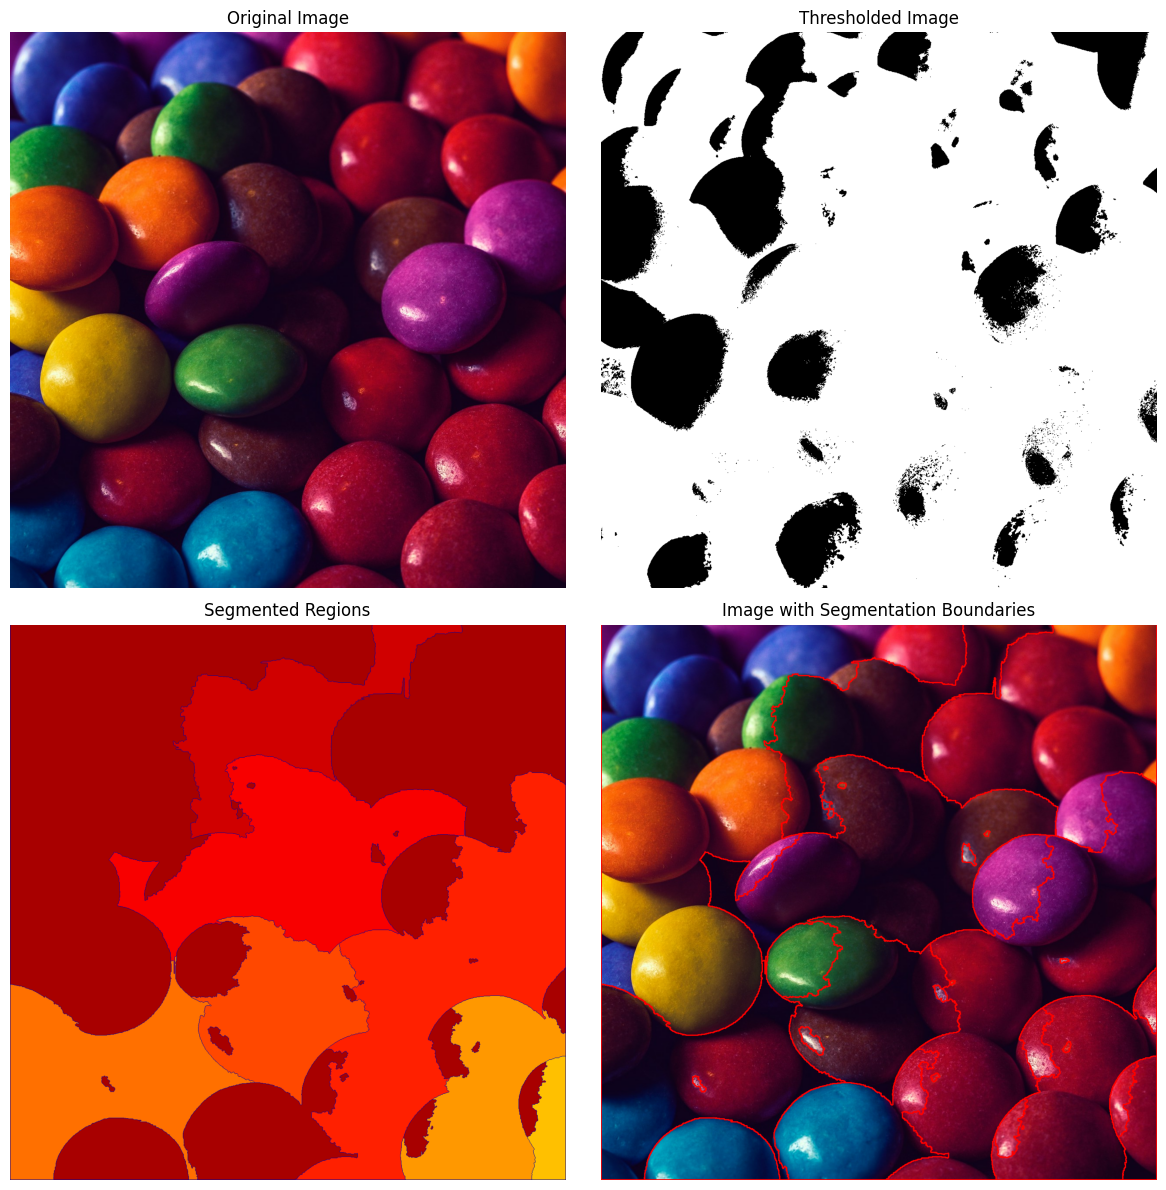

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_square(img):
  h, w = img.shape[:2]
  min_dim = min(h, w)

  # Calculate cropping area
  top = (h - min_dim) // 2
  bottom = top + min_dim
  left = (w - min_dim) // 2
  right = left + min_dim

  # Crop the image to the square
  return img[top:bottom, left:right]

# Load and preprocess the image
image = cv2.imread("candies.jpg")

# Crop the image to make it square
image = crop_square(image)

# Convert to RGB (matplotlib uses RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold to get binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological opening
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv2.watershed(image, markers)

# Create a copy of the image to draw contours
image_with_contours = image_rgb.copy()

# Draw thicker contours on the image
boundary_mask = np.uint8(markers == -1)  # Convert boolean mask to uint8
dilated_boundary = cv2.dilate(boundary_mask, kernel)  # Apply dilation
image_with_contours[dilated_boundary == 1] = [255, 0, 0]

# Crop all images to square
image_rgb_square = crop_square(image_rgb)
thresh_square = crop_square(thresh)
markers_square = crop_square(cv2.applyColorMap((markers * 10).astype(np.uint8), cv2.COLORMAP_JET))
image_with_contours_square = crop_square(image_with_contours)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(image_rgb_square)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(thresh_square, cmap='gray')
ax[1].set_title("Thresholded Image")
ax[1].axis('off')

ax[2].imshow(markers_square, cmap='jet')
ax[2].set_title("Segmented Regions")
ax[2].axis('off')

ax[3].imshow(image_with_contours_square)
ax[3].set_title("Image with Segmentation Boundaries")
ax[3].axis('off')

plt.tight_layout()
plt.show()

An image of candies was subjected to watershed algorithm-based image segmentation. This is an algorithm for the segmentation of an image with overlapping or touching objects. The nature of pixel intensity values is treated as the topographic surface by the algorithm, in which the peaks represent the high-intensity regions and the valleys correspond to low-intensity regions. By flooding the image from its local minima, the algorithm can separate regions by identifying boundaries, much like watersheds divide land areas. The input image shown here above left to illustrate segmentation using candies, which are good for testing the segmentation process because of clear contrast in the area between candy edges and their surrounding regions.

The results include the following stages: a thresholded image (right top), segmented regions (left bottom), and a final image with segmentation boundaries (right bottom). The thresholded image is a binarization of the original, it isolates all the regions of interest within which the algorithm will operate. Segmented regions demonstrate how candies were categorized into different groups according to color intensity, while the final image depicts the boundary of the region with red lines in order to distinguish the regions.

The above image is suitable for Watershed Algorithm as candies are well-defined with strong edges facilitating the algorithm to distinguish between boundaries of objects in contact or overlap. Bright colors as well as varied intensities further help the algorithm to produce a fine segmentation. The Watershed method is highly efficient for such a task, in where objects are composed of several overlapping objects of comparable intensities, since the method will produce unambiguous separations, based both on intensity gradients and object edges.

## Key Points
* Image segmentation is crucial for object detection and recognition.
* The Watershed algorithm is especially useful for separating overlapping objects.

In [14]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Exercise 3 - Advanced Feature Extraction and Image Processing.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Exercise 3 - Advanced Feature Extraction and Image Processing.ipynb to pdf
[NbConvertApp] Support files will be in Exercise 3 - Advanced Feature Extraction and Image Processing_files/
[NbConvertApp] Making directory ./Exercise 3 - Advanced Feature Extraction and Image Processing_files
[NbConvertApp] Making directory ./Exercise 3 - Advanced Feature Extraction and Image Processing_files
[NbConvertApp] Making directory ./Exercise 3 - Advanced Feature Extraction and Image Processing_files
[NbConvertApp] Making directory ./Exercise 3 - Advanced Feature Extraction and Image Processing_files
[NbConvertApp] Writing 60337 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF success